# ADAMS Explanatory Data Analysis

## Understanding the Data


In this notebook, we will be working with the "Home Equity" data set. This data was provided by www.creditriskanalytics.com.

With this dataset, we can attempt to solve the problem of differentiating people who are likely to default on their loans from those who are not. This stages a common scenario for a data scientist. The data contains information about the customer's situation. The target variable is 'BAD', indicating whether or not an individual has later defaulted on the loan. 

This notebook provides a visual analysis of the data.
<br> 

Before we get started, let's import the necessary libraries and the data.
<br>
<br>
### Importing Libraries

In [23]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
plt.rcParams["figure.figsize"] = (20,10)

### Importing Data

In [24]:
credit = pd.read_csv('/Users/wiebkeberlin/Downloads/hmeq.csv')

### A First Look at the Data

In [25]:
#find out the  size of data set
credit.shape


(5960, 13)

In [26]:
credit.info()
credit.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


BAD  LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0    1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1    1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2    1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3    1  1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4    0  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  NINQ  CLNO  DEBTINC  
0   94.366667   1.0   9.0      NaN  
1  121.833333   0.0  14.0      NaN  
2  149.466667   1.0  10.0      NaN  
3         NaN   NaN   NaN      NaN  
4   93.333333   0.0  14.0      NaN

The data set consists of 5960 observations and 13 variables. 
The variables are defined as the following:

- BAD: 1=default; 0=non-default
- LOAN: amount of the loan request
- MORTDUE: amount due on existing mortgage
- VALUE: value of current property
- REASON: DebtCon=debt consolidation; HomeImp=home improvement
- JOB: occupational categories
- YOJ: years at present job
- DEROG: number of major derogatory reports
- DELINQ: number of delinquent credit lines
- CLAGE: age of oldest credit line in months
- NINQ: number of recent credit inquiries
- CLNO: number of credit lines
- DEBTINC: debt-to-income ratio


We will get started with the describe function. 

In [27]:
#include all includes non-numeric variables)

credit.describe(include='all')

BAD          LOAN        MORTDUE          VALUE   REASON  \
count   5960.000000   5960.000000    5442.000000    5848.000000     5708   
unique          NaN           NaN            NaN            NaN        2   
top             NaN           NaN            NaN            NaN  DebtCon   
freq            NaN           NaN            NaN            NaN     3928   
mean       0.199497  18607.969799   73760.817200  101776.048741      NaN   
std        0.399656  11207.480417   44457.609458   57385.775334      NaN   
min        0.000000   1100.000000    2063.000000    8000.000000      NaN   
25%        0.000000  11100.000000   46276.000000   66075.500000      NaN   
50%        0.000000  16300.000000   65019.000000   89235.500000      NaN   
75%        0.000000  23300.000000   91488.000000  119824.250000      NaN   
max        1.000000  89900.000000  399550.000000  855909.000000      NaN   

          JOB          YOJ        DEROG       DELINQ        CLAGE  \
count    5681  5445.000000  5252.000000  5380.000000  5652.000000   
unique      6          NaN          NaN          NaN          NaN   
top     Other          NaN          NaN          NaN          NaN   
freq     2388          NaN          NaN          NaN          NaN   
mean      NaN     8.922268     0.254570     0.449442   179.766275   
std       NaN     7.573982     0.846047     1.127266    85.810092   
min       NaN     0.000000     0.000000     0.000000     0.000000   
25%       NaN     3.000000     0.000000     0.000000   115.116702   
50%       NaN     7.000000     0.000000     0.000000   173.466667   
75%       NaN    13.000000     0.000000     0.000000   231.562278   
max       NaN    41.000000    10.000000    15.000000  1168.233561   

               NINQ         CLNO      DEBTINC  
count   5450.000000  5738.000000  4693.000000  
unique          NaN          NaN          NaN  
top             NaN          NaN          NaN  
freq            NaN          NaN          NaN  
mean       1.186055    21.296096    33.779915  
std        1.728675    10.138933     8.601746  
min        0.000000     0.000000     0.524499  
25%        0.000000    15.000000    29.140031  
50%        1.000000    20.000000    34.818262  
75%        2.000000    26.000000    39.003141  
max       17.000000    71.000000   203.312149

How many categorical variables do we have? How many numeric?
<br> 
What can be said about the distribution of the numeric variables?
What information can we find on the categorical variables?
<br> 
Can you identify variables with missing values?
<br><br>

### Minimal Data Preparation

In [28]:
#category encoding
credit['REASON'] = credit['REASON'].astype('category')
credit['JOB'] = credit['JOB'].astype('category')
credit['BAD'] = credit['BAD'].astype('bool')
credit['LOAN'] = credit['LOAN'].astype(np.float64)
credit.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   bool    
 1   LOAN     5960 non-null   float64 
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: bool(1), category(2), float64(10)
memory usage: 483.5 KB


In [29]:
#count of missing values
credit.isnull().sum().sum()

5271

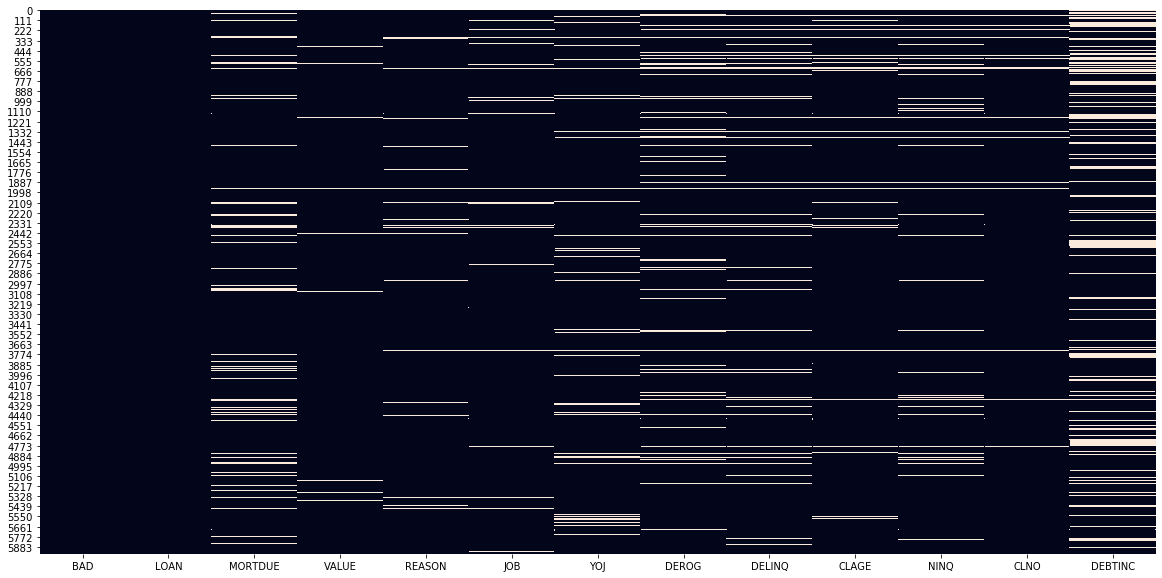

In [30]:
#quick visualization of the missing values in our data set
sns.heatmap(credit.isnull(), cbar=False);


Which variables show missing values? Which type of variable are they and what are the best treatment options?

<br> <br>
For now: We will replace categorical values with the mode and numerical values with the average.

In [31]:
for col in credit.select_dtypes(include='category').columns:
    if credit[col].isna().sum() > 0:
         credit[col].fillna(credit[col].mode()[0], inplace=True)   

In [32]:
for col in credit.select_dtypes(exclude='category').columns:
    if credit[col].isna().sum() > 0:
        credit[col].fillna(-1, inplace=True)      

In [33]:
# see if it worked, count again
credit.isnull().sum().sum()

0

<br> <br>
## Univariat Distribution

### Categorical Values


In this part, we will examine  our target variable 'BAD', as well as the two categorical variables 'REASON' and 'JOB' individually. Firstly, we will count how many observations belong to each category of a variable.

In [34]:
credit.select_dtypes(exclude='float64').apply(pd.Series.value_counts).fillna(0, downcast='infer')


BAD  REASON   JOB
False    4771       0     0
True     1189       0     0
DebtCon     0    4180     0
HomeImp     0    1780     0
Mgr         0       0   767
Office      0       0   948
Other       0       0  2667
ProfExe     0       0  1276
Sales       0       0   109
Self        0       0   193

<br> <br>
A different way to present this data is visually.

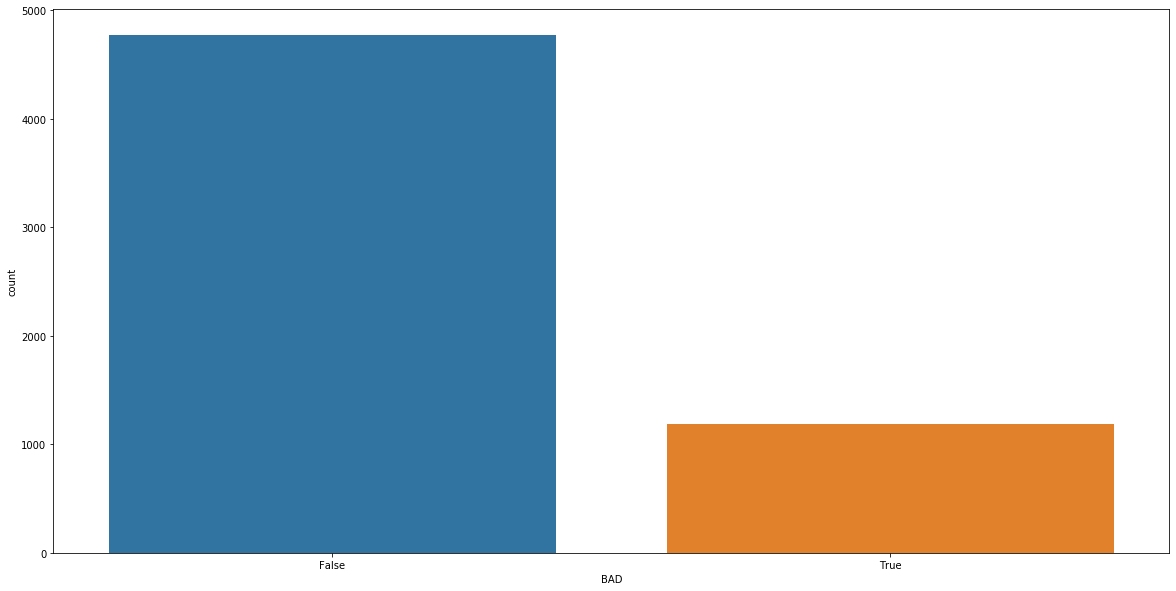

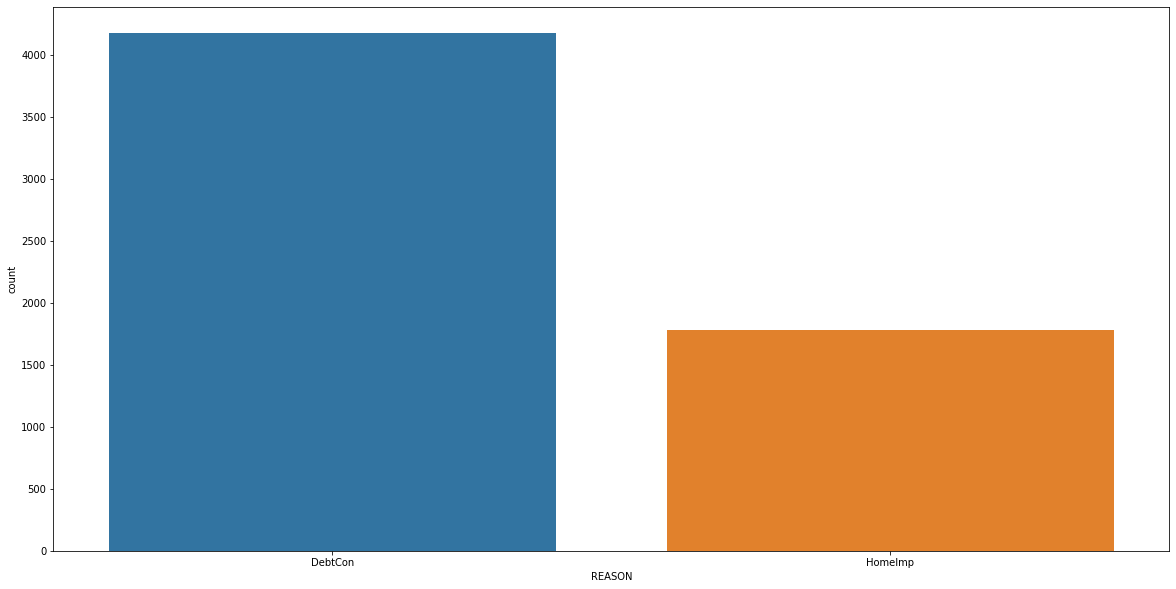

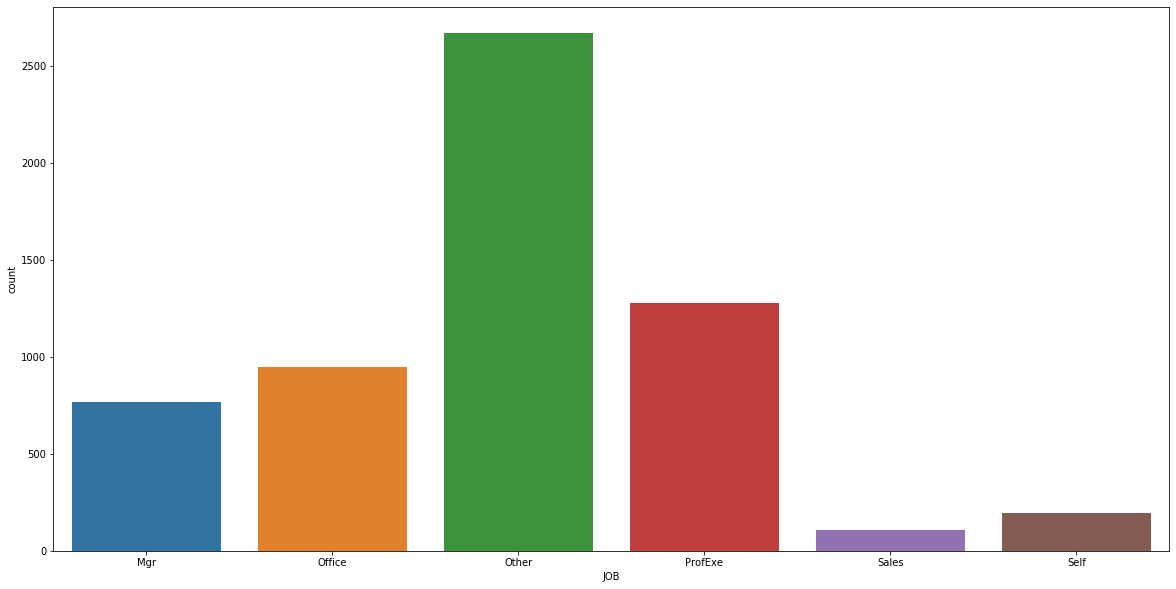

In [35]:
#exlude float leaves us with the target variable and both categorical variables
for i, col in enumerate(credit.select_dtypes(exclude='float64').columns):
    plt.figure(i)
    sns.countplot(x=col, data=credit)


What can be said about the target variable? <br>
Are there indicators for imbalance?<br>
What information can be gained?
<br>
<br>

### Univariate Distribution of Numeric Variables

Now we can start by taking a closer look at the numeric variables and their distribution. The hist() function will give us more insight.

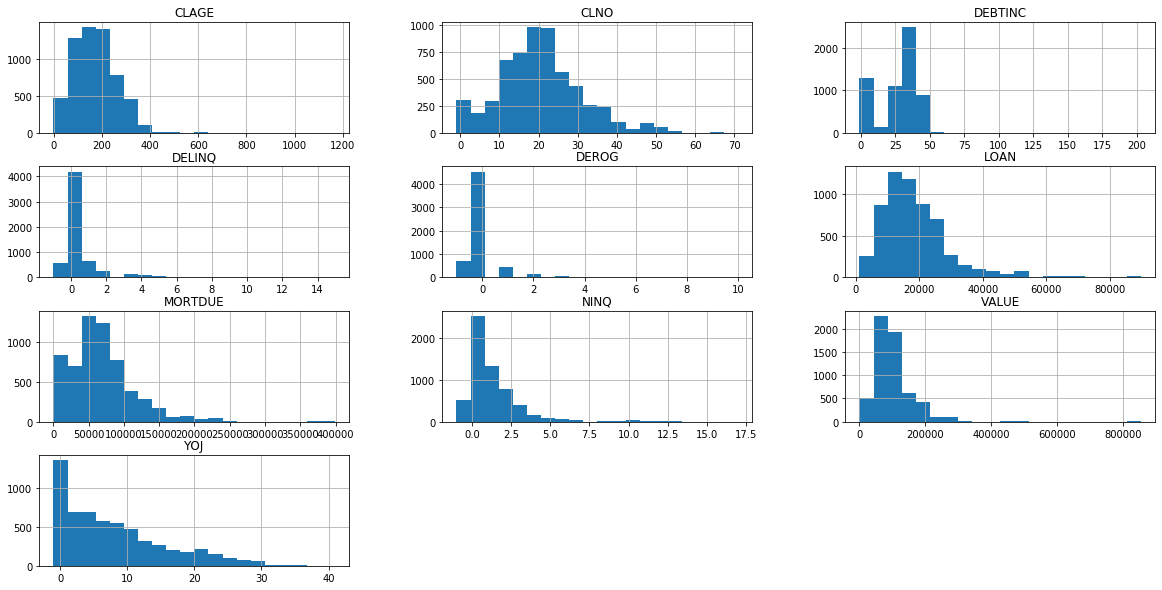

In [36]:
#bin parameter to set frequency of bars

credit.select_dtypes(include='float64').hist(bins=20); 


What does the histogram say about the different types of numeric values? 
For example: What differentiates the variable 'MORTDUE' from 'DEROG'?
Can you identify outliers? 
<br>
<br>
To be able to identify the outliers better, a look at the boxplots should be taken.

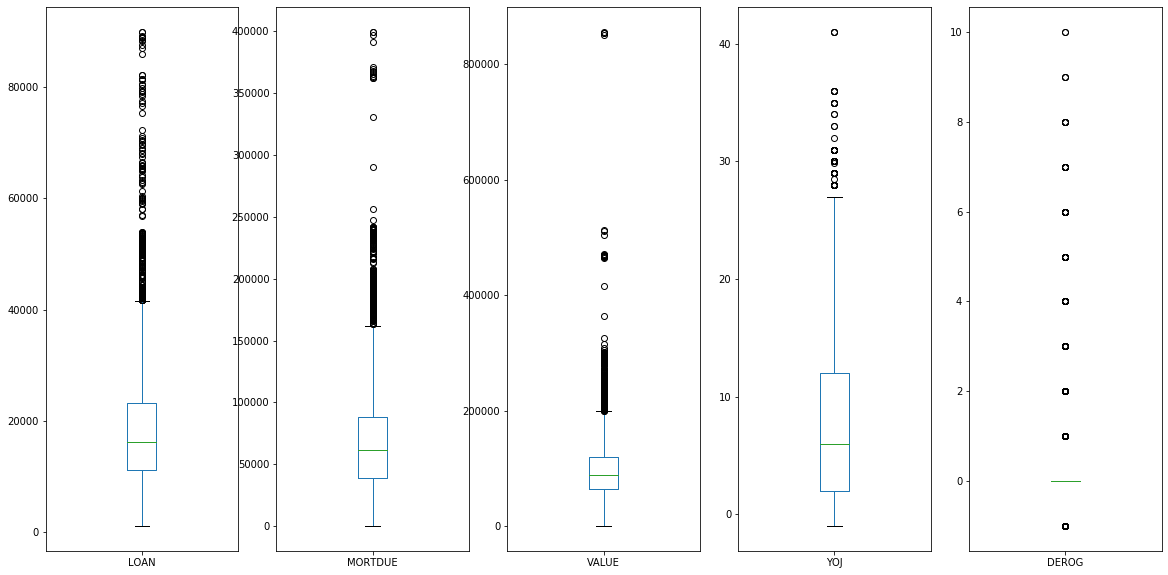

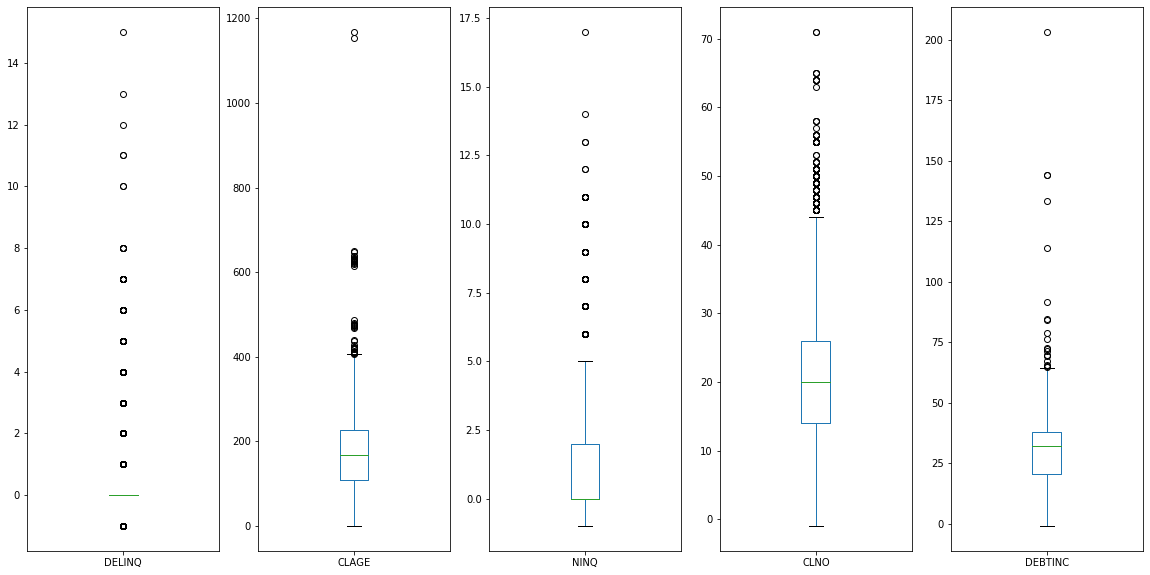

In [37]:
n_rows = 2
col_start = 0
delta = 5
col_end = 0

for i in range(n_rows):

    col_end = col_start + delta
    credit.select_dtypes(include='float64').iloc[:, col_start:col_end].plot(kind = 'box', subplots=True)
    col_start += delta
plt.show()

Can we use our knowledge from the histograms to explain the difference between for instance 'MORTDUE' und 'DELINQ'? Which variables have outliers? What treatment would you recommend? Can we display this data in a better way? 
<br> 


<br> <br>

## Multivariate Analysis

After gaining more knowledge about the variables individually, it is important to examine their relationships more closely. In data science, this is a good way of identifying redundant information as well as variable interactions. 


#### Numeric Variables

Next, we will plot a heatmap. It shows the correlation for all numeric variables. 


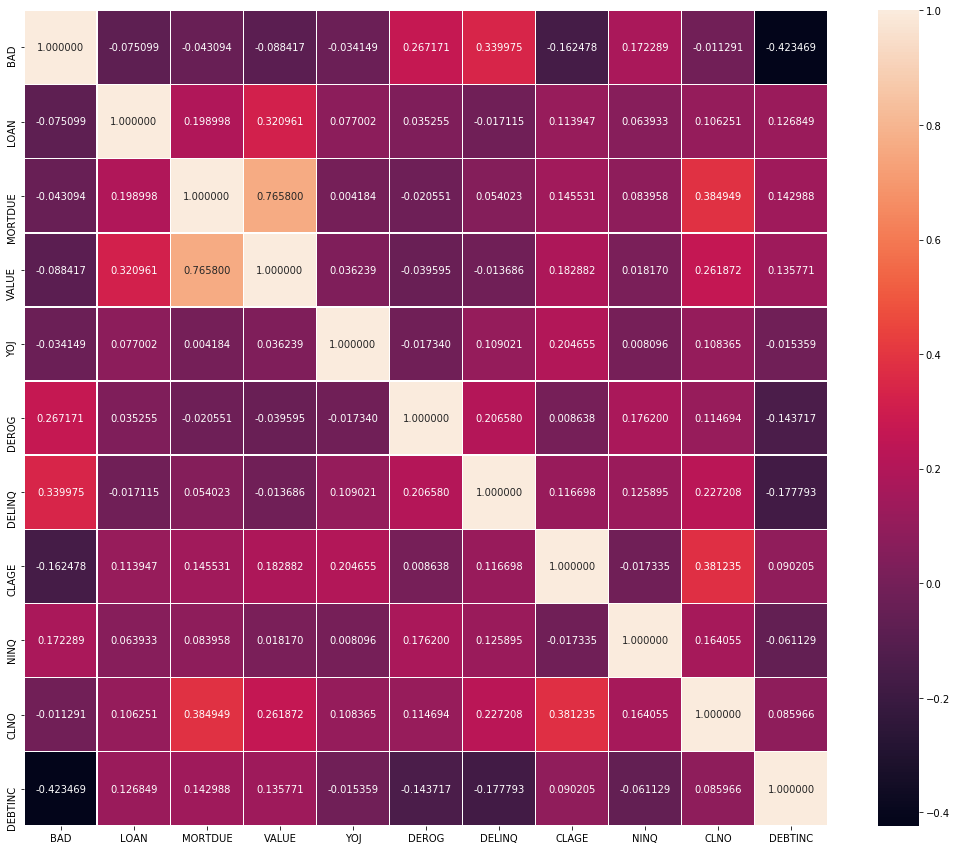

In [38]:
corr= credit.corr()
f,ax = plt.subplots(figsize=(18, 15))
sns.heatmap(corr ,annot=True,linewidth=.5,fmt='1f');

 

 Due to the amount of variables it can be hard to filter the important variable relationships. We can solve this by filtering from a specific threshold. Following, we will set the threshold to 0.30.

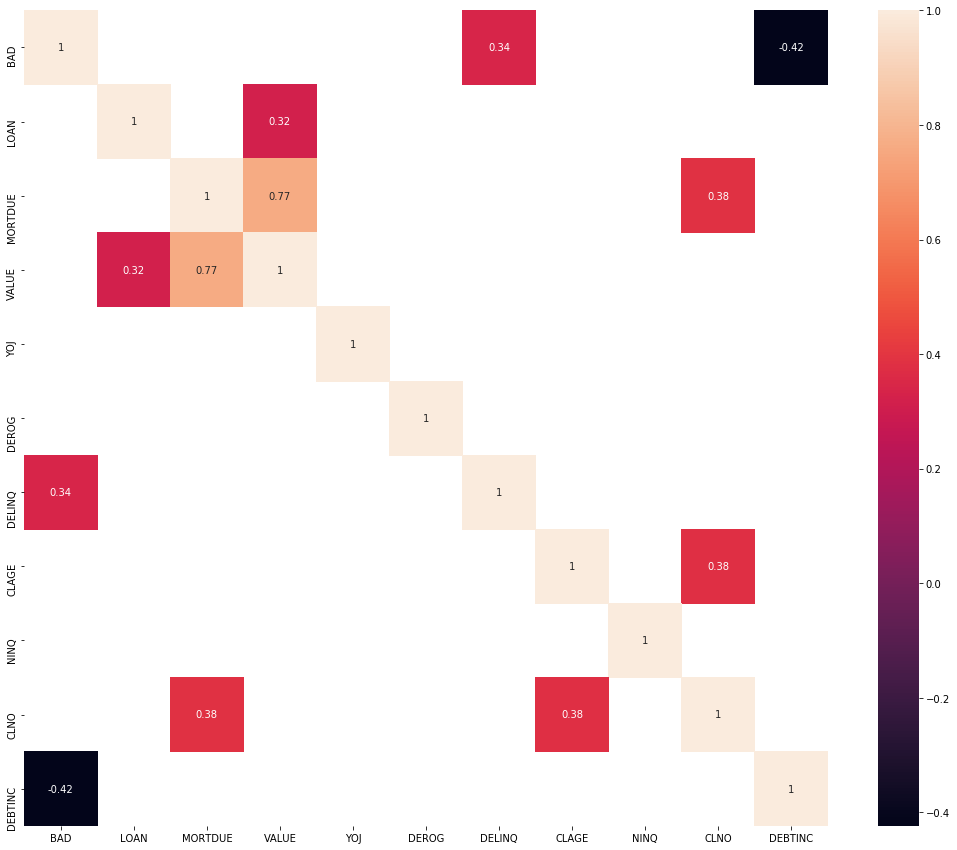

In [39]:
f,ax = plt.subplots(figsize=(18, 15))
sns.heatmap(corr[(corr >= 0.30) | (corr <= -0.30)],
            annot=True);

What can you say about the correlation of the numeric variables?
Identify the highest values. Are these relationship justifiable?
Interpret the relationships in a real world context.
<br> <br>


### Multivariate Analysis of Categorical Variables

A common way to display categorical variables is the stacked histogram. Let us analyze the variabels 'REASON' and 'JOB' and how they are linked to the target variable.


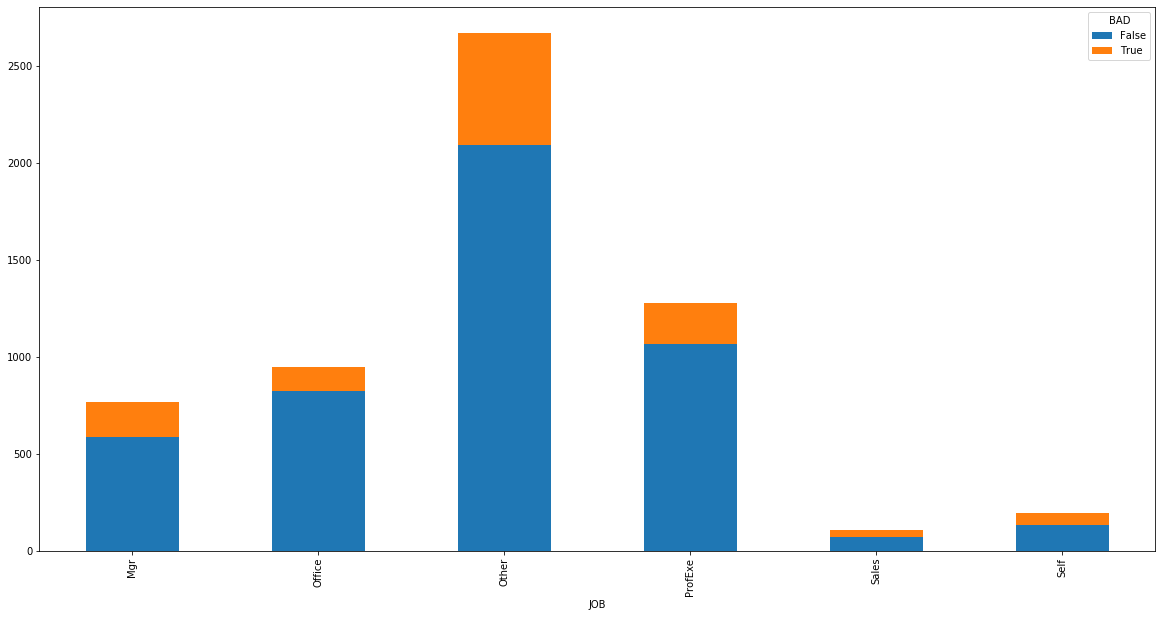

In [40]:
job = credit.groupby(['BAD', 'JOB']).size().reset_index().pivot(columns='BAD', index='JOB', values=0)
                                                                       
job.plot(kind='bar', stacked=True);

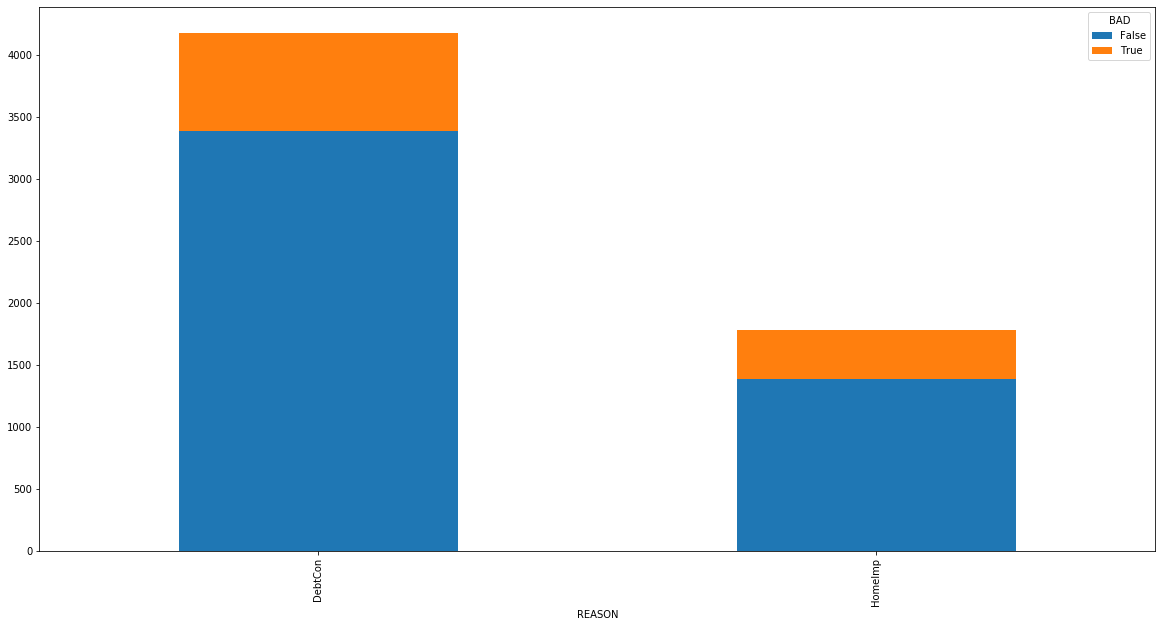

In [41]:
reason = credit.groupby(['BAD', 'REASON']).size().reset_index().pivot(columns='BAD', index='REASON', values=0)
                                                                       
reason.plot(kind='bar', stacked=True); 

Are these displays useful in this case? What information can be drawn?
Which category in 'job' and 'reason' has defaulted more likely in the past?
What would be a better representation?


For this particular example, the stacked barplot has not given us more insight, we will plot a crosstab with percentages as its values instead of its total counts to allow better comparability.

In [42]:
#save this data for the next plot
job = pd.crosstab(credit.JOB, credit.BAD).apply(lambda r: r/r.sum(), axis=1)
job

BAD         False     True 
JOB                        
Mgr      0.766623  0.233377
Office   0.868143  0.131857
Other    0.783652  0.216348
ProfExe  0.833856  0.166144
Sales    0.651376  0.348624
Self     0.699482  0.300518

In [43]:
#save this data for the next plot
reason = pd.crosstab(credit.REASON, credit.BAD).apply(lambda r: r/r.sum(), axis=1)
reason

BAD         False     True 
REASON                     
DebtCon  0.810287  0.189713
HomeImp  0.777528  0.222472

Let's make these tables into a graph:


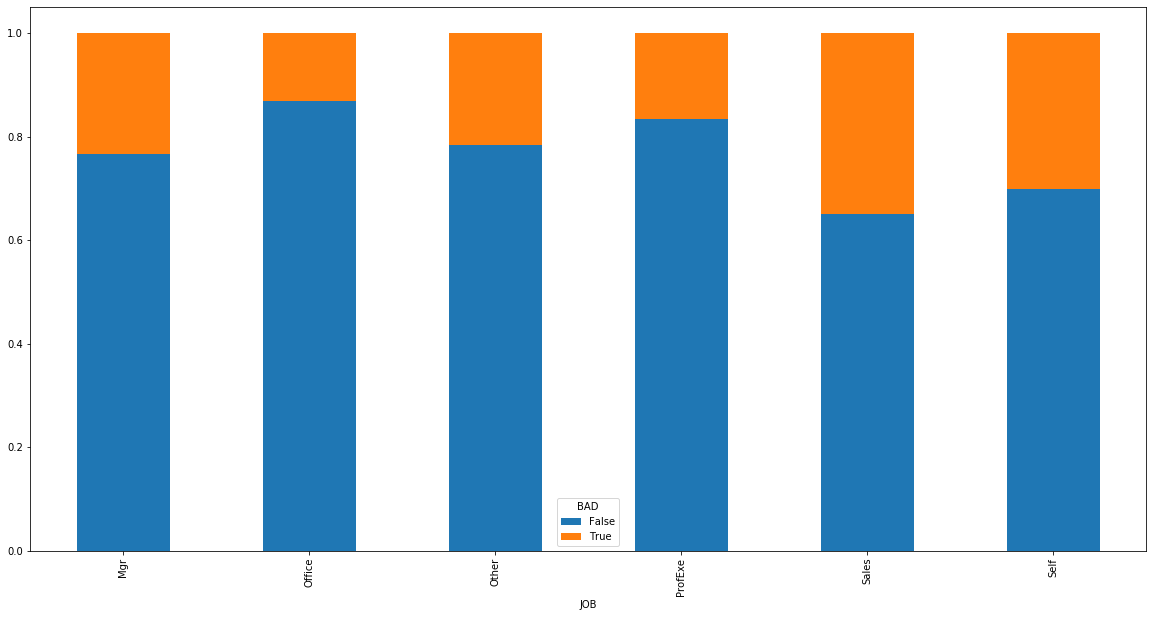

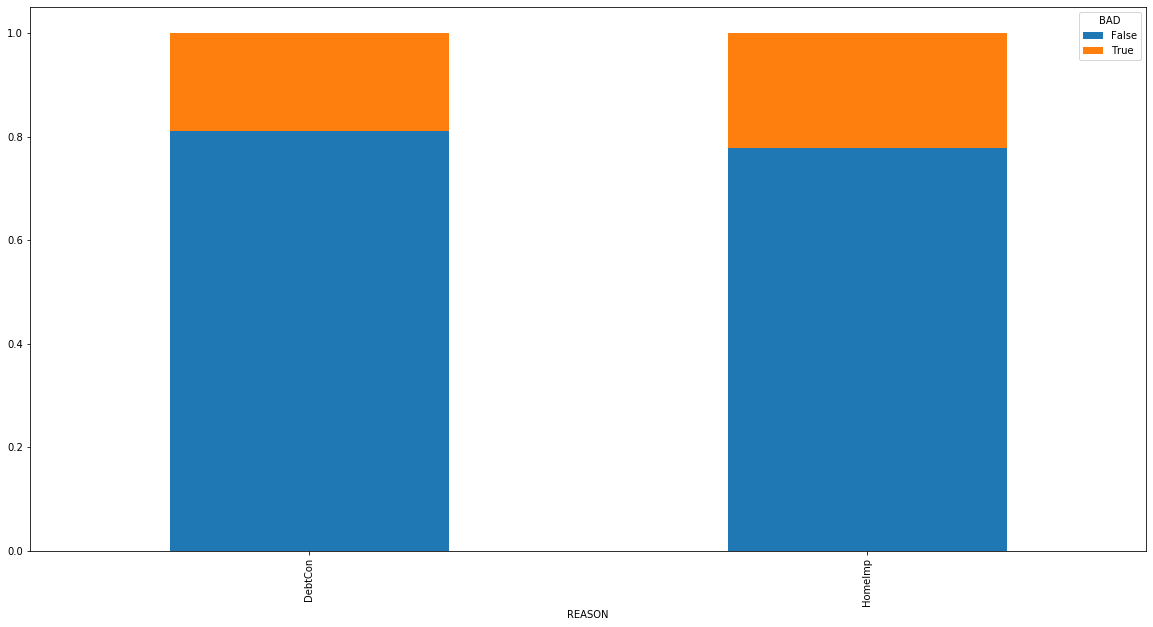

In [44]:
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
reason.div(reason.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True);


Can you spot any important differences in these tables? Which display of the data do you find most adequate?
<br><br>

### Interactions Between Num. & Cat. Variables
Next, we can have a look at the distribution of our categories across the numerical variables. 


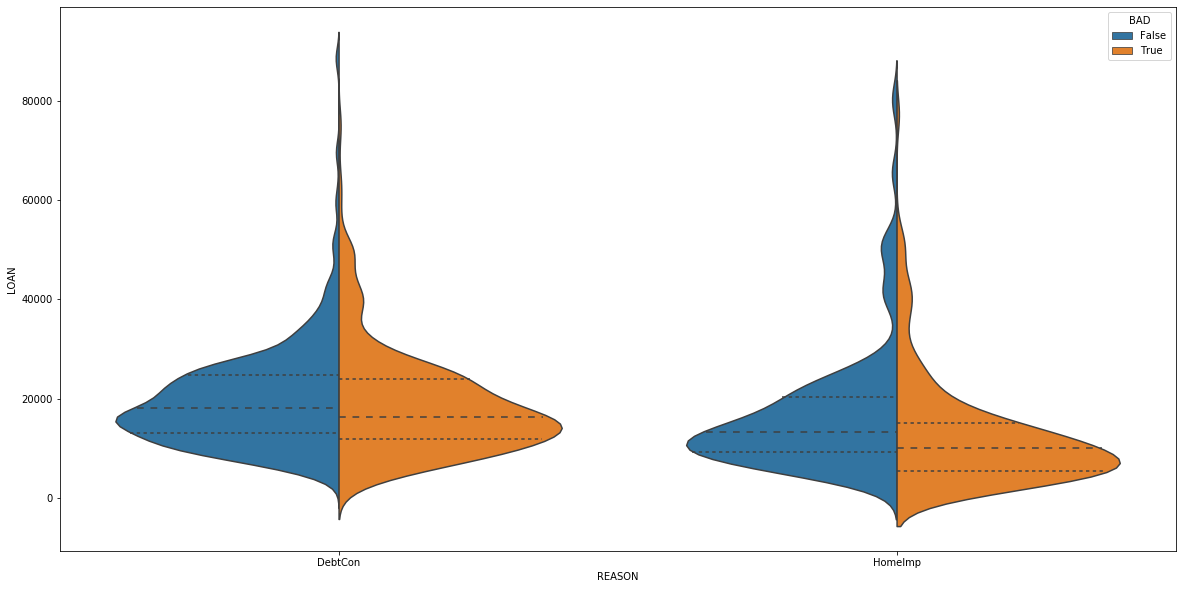

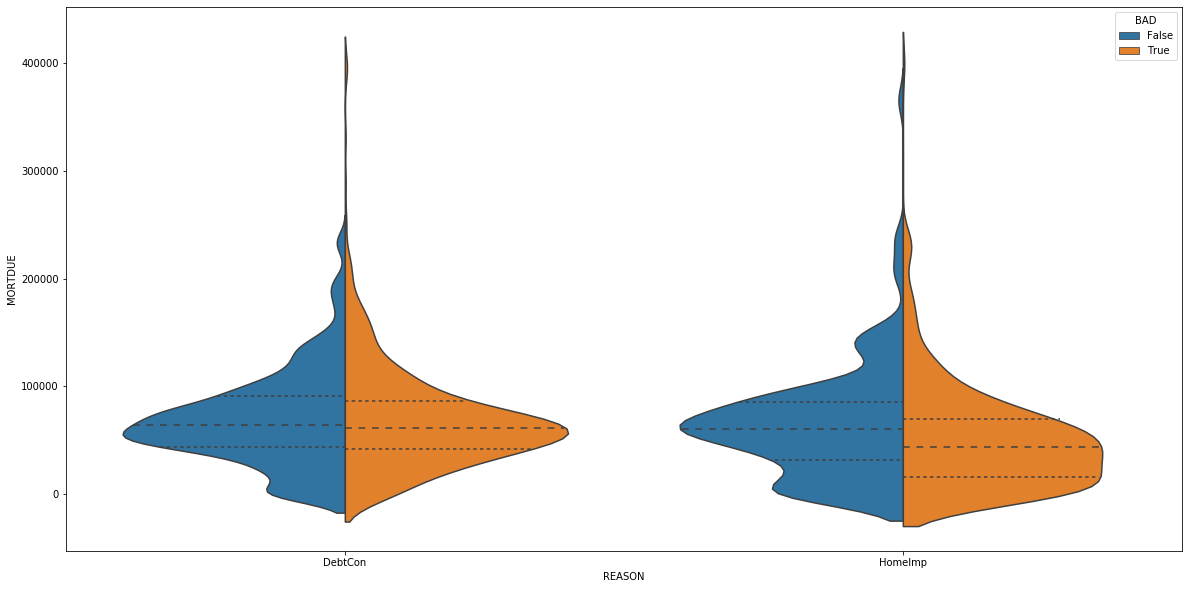

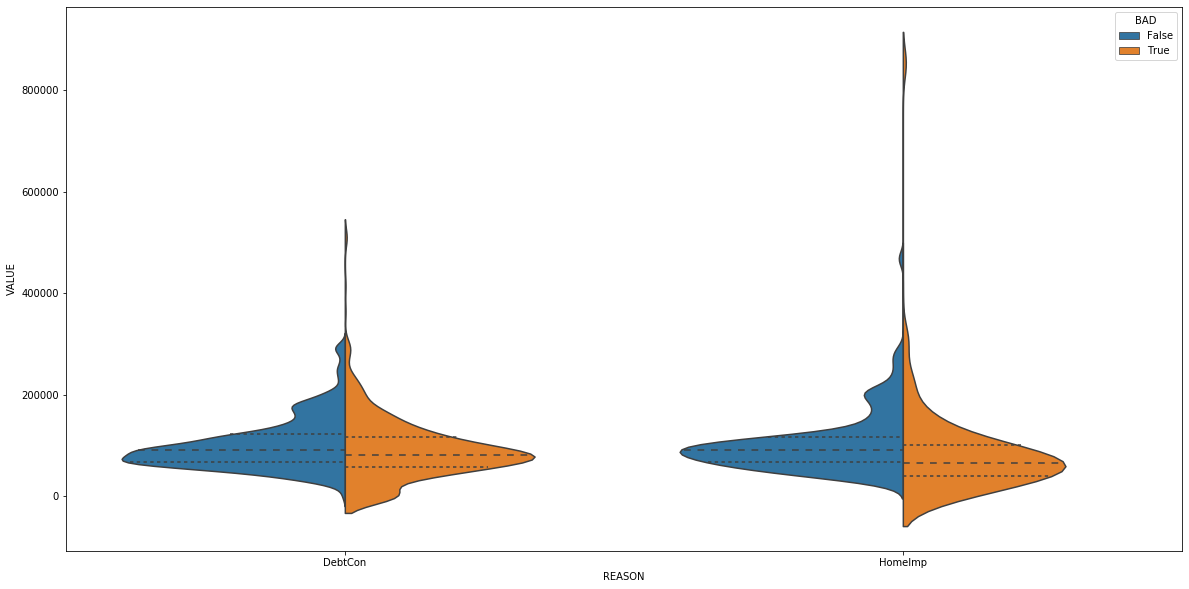

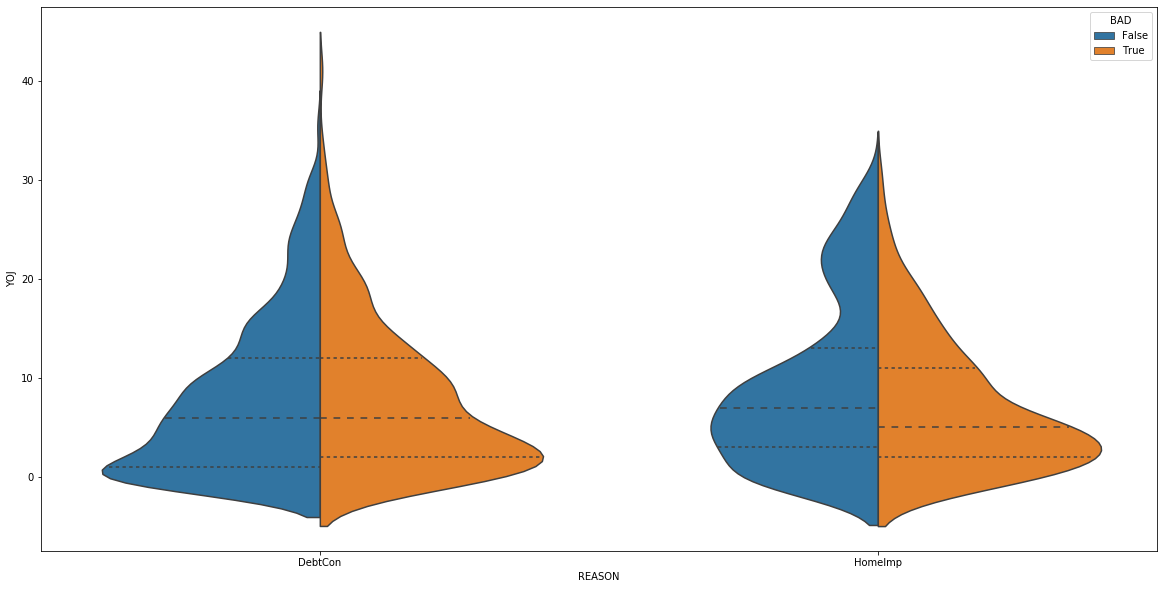

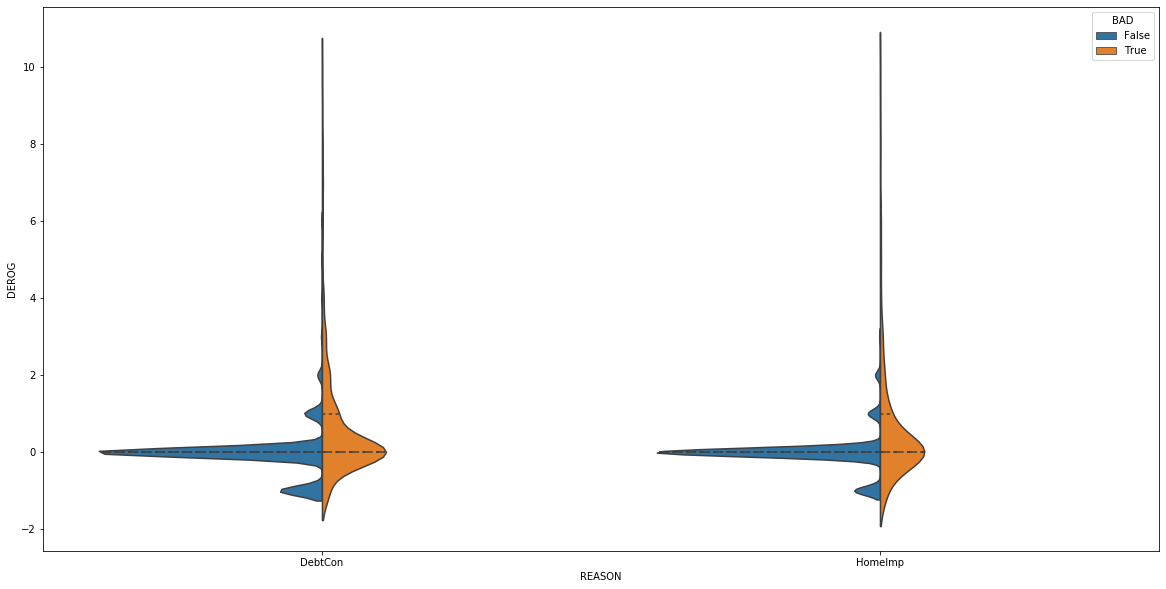

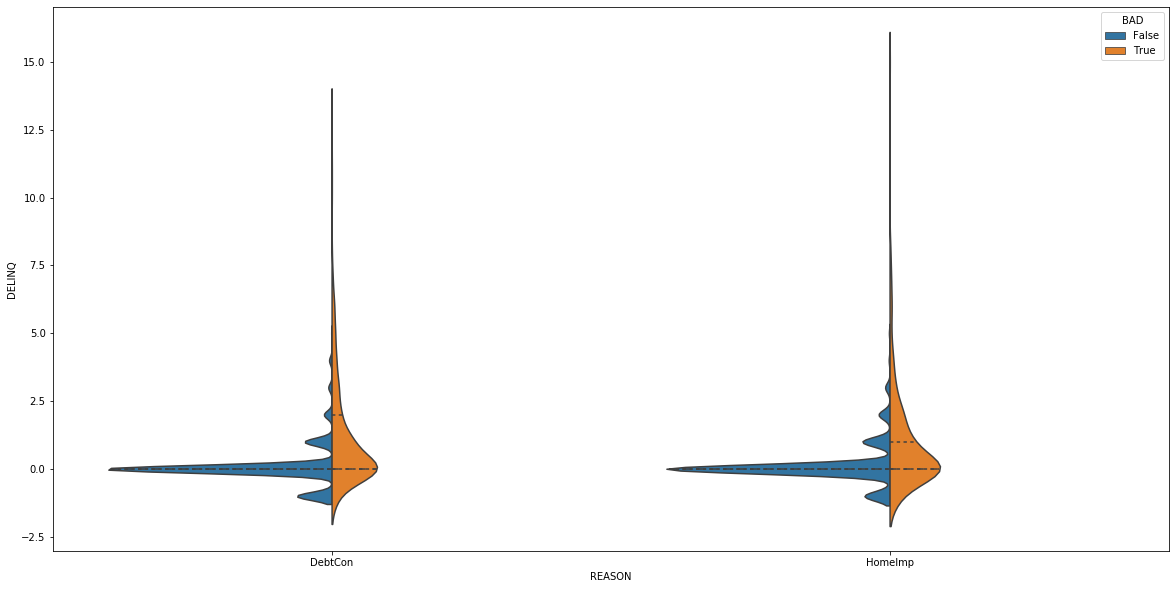

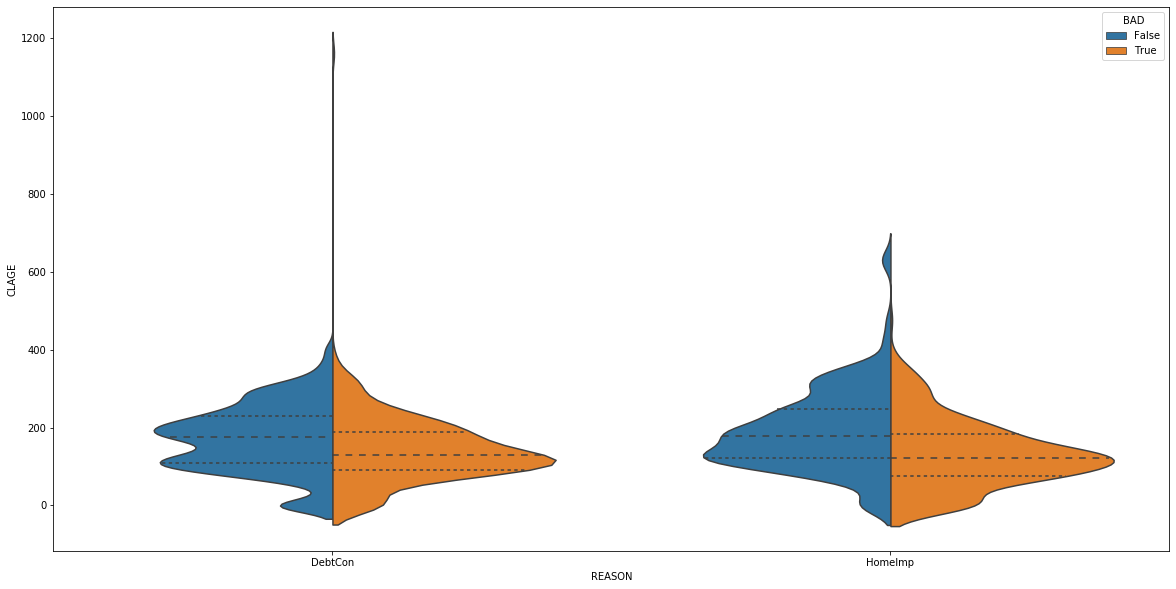

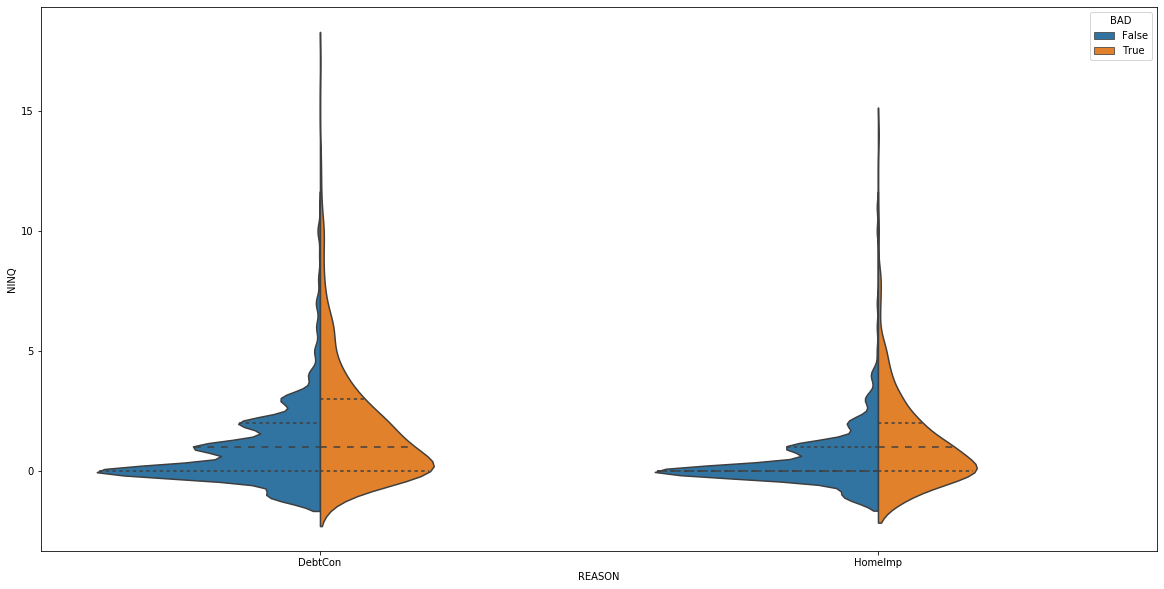

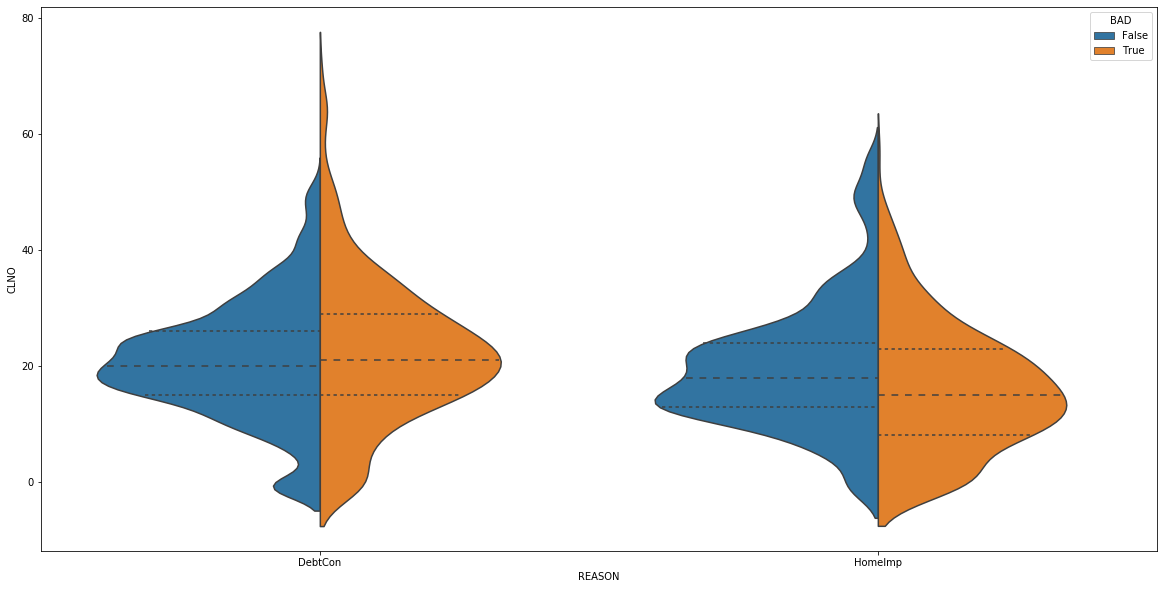

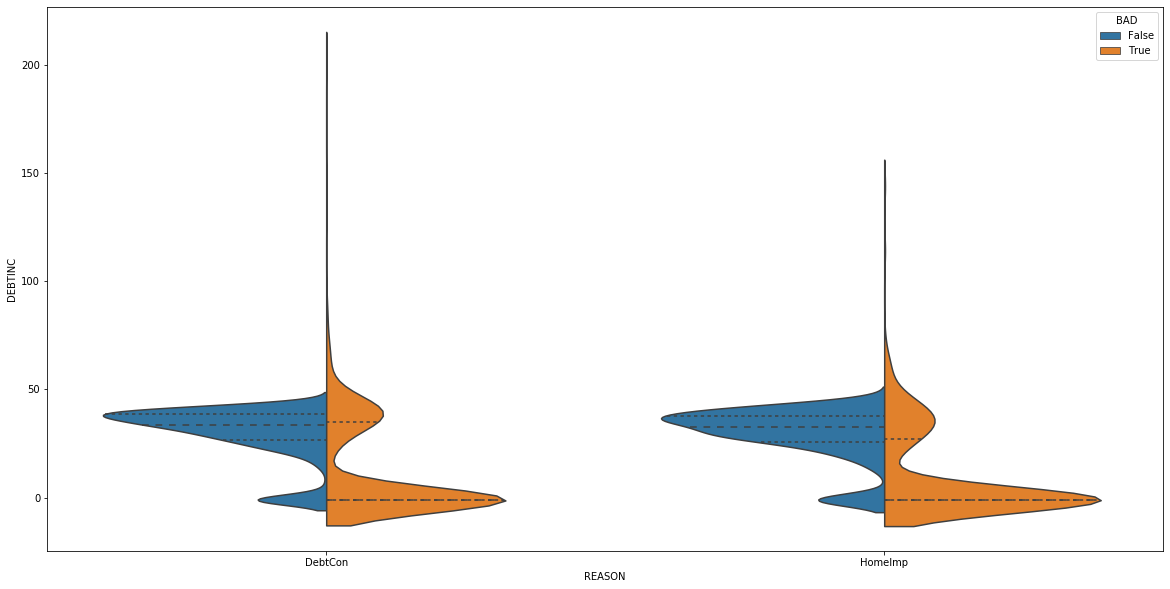

In [45]:
#repeat for 'REASON'
for col  in credit.select_dtypes(include='float64').columns:
    
    plt.figure()

    sns.violinplot(x='REASON', y=col, hue='BAD',
                   split=True, inner="quart",
                   data= credit, subplots=True)



What do you have to look for to identify the relevant information in this graph?
How do the reasons for the loan 'debt consolidation' and 'home improvement' differ? 
What can be said about the relationships to the numeric variables? 

Let's repeat this for the variable 'JOB':

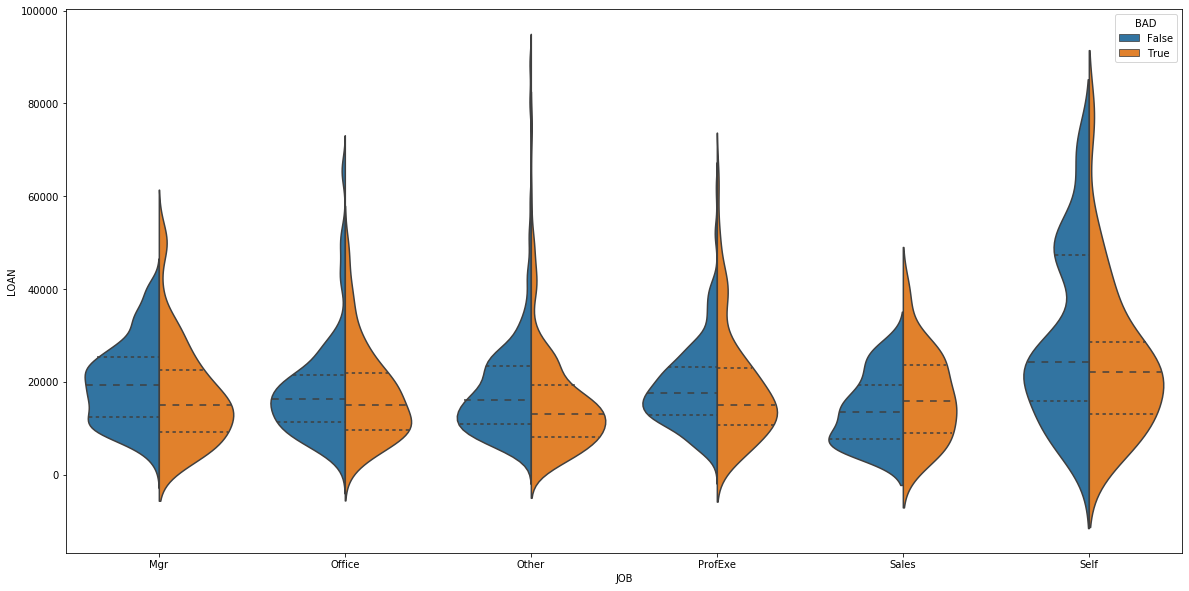

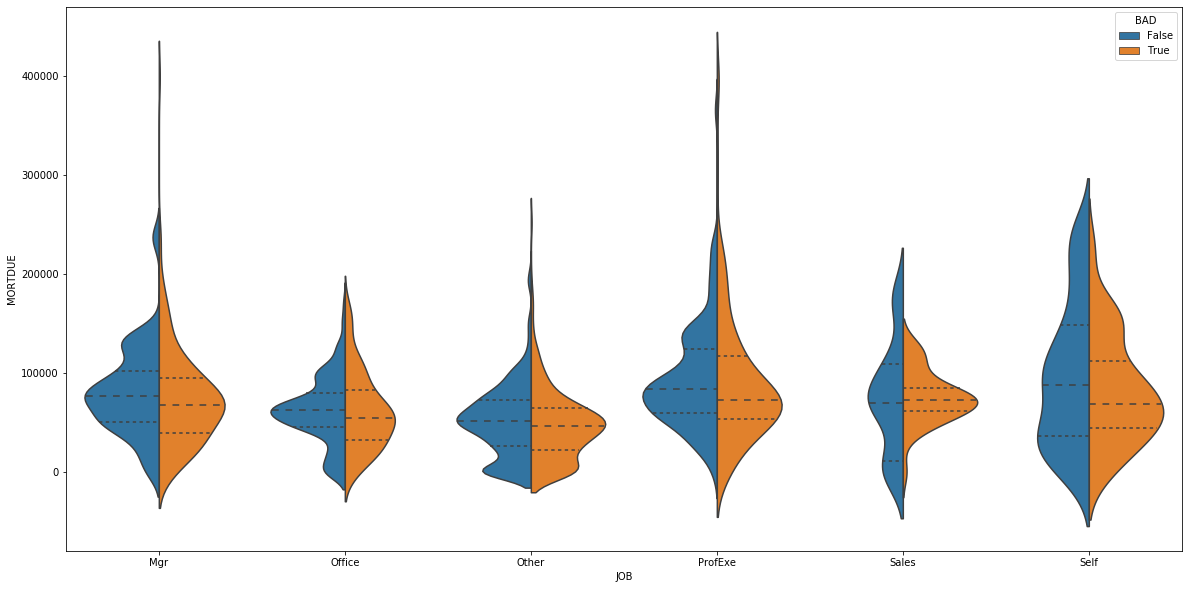

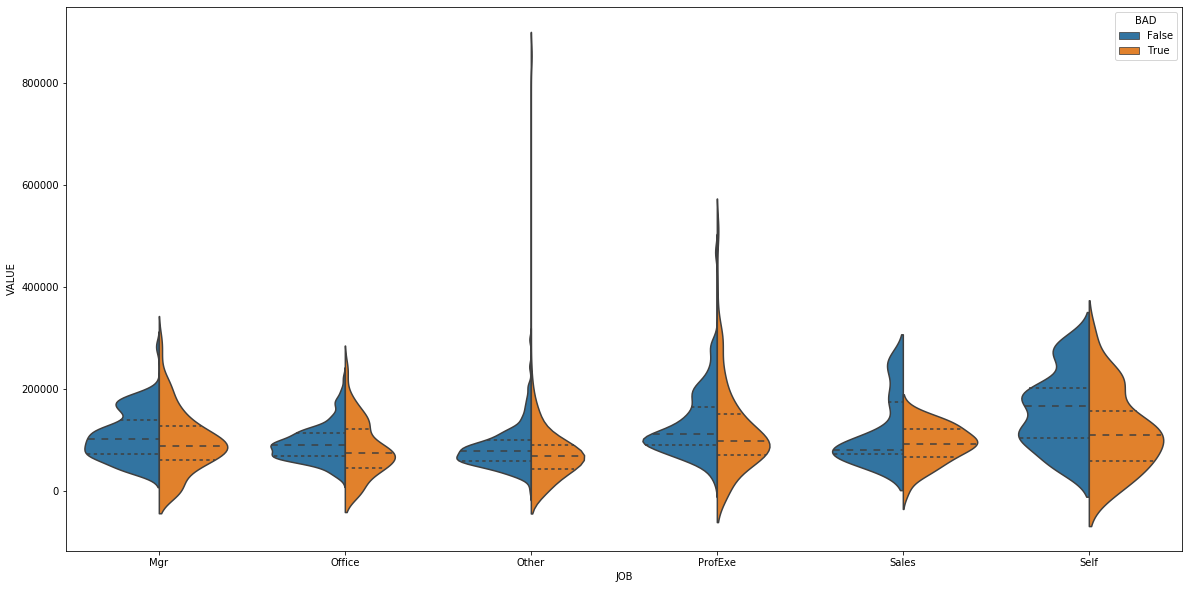

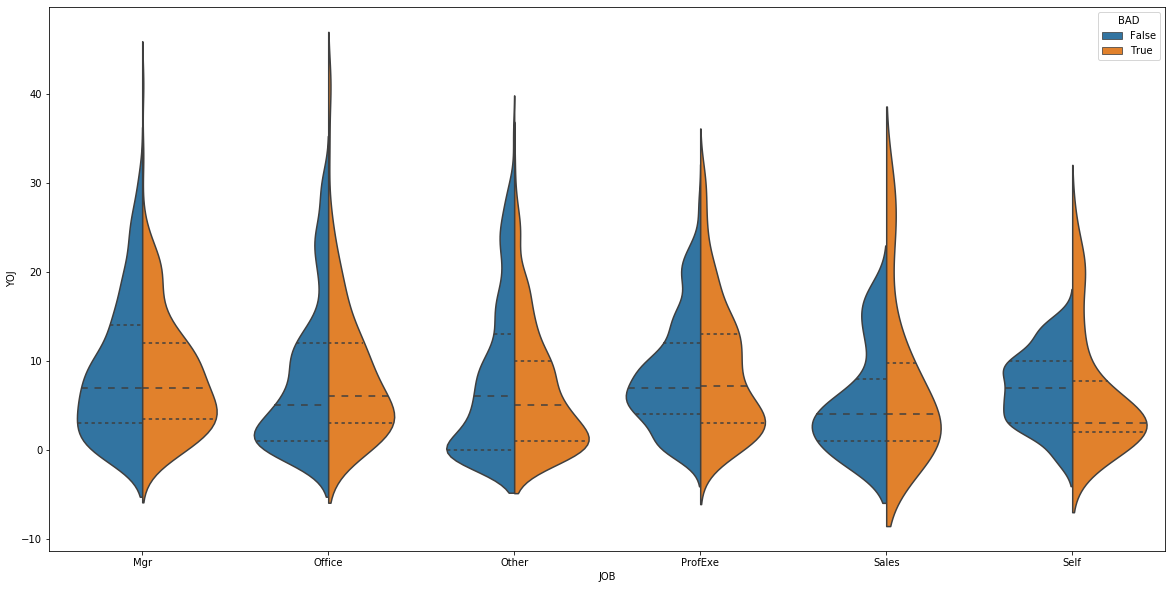

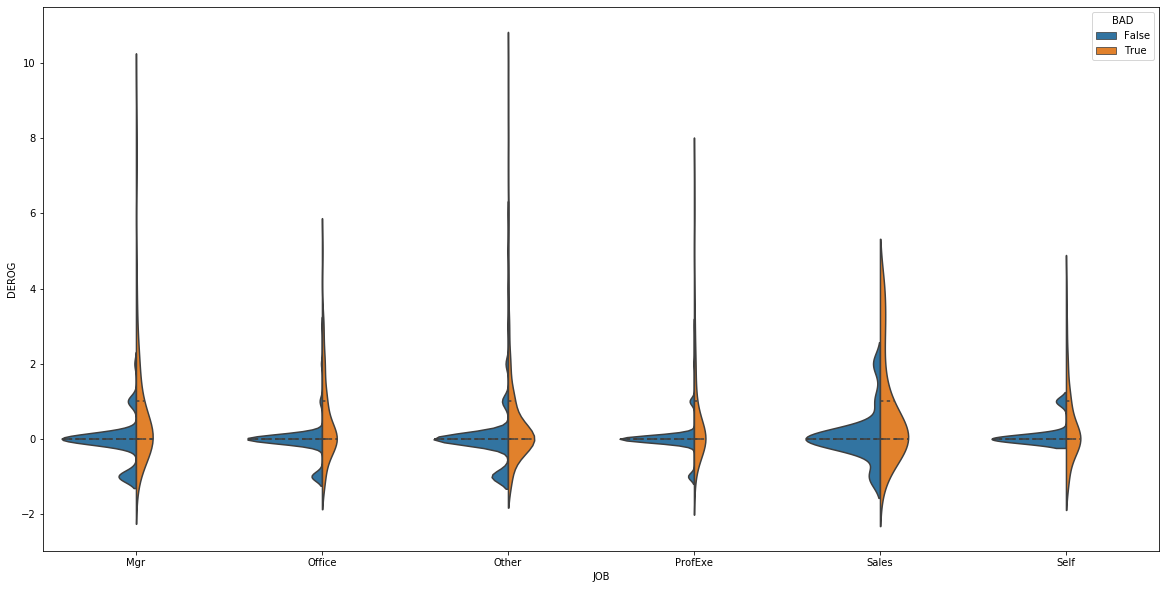

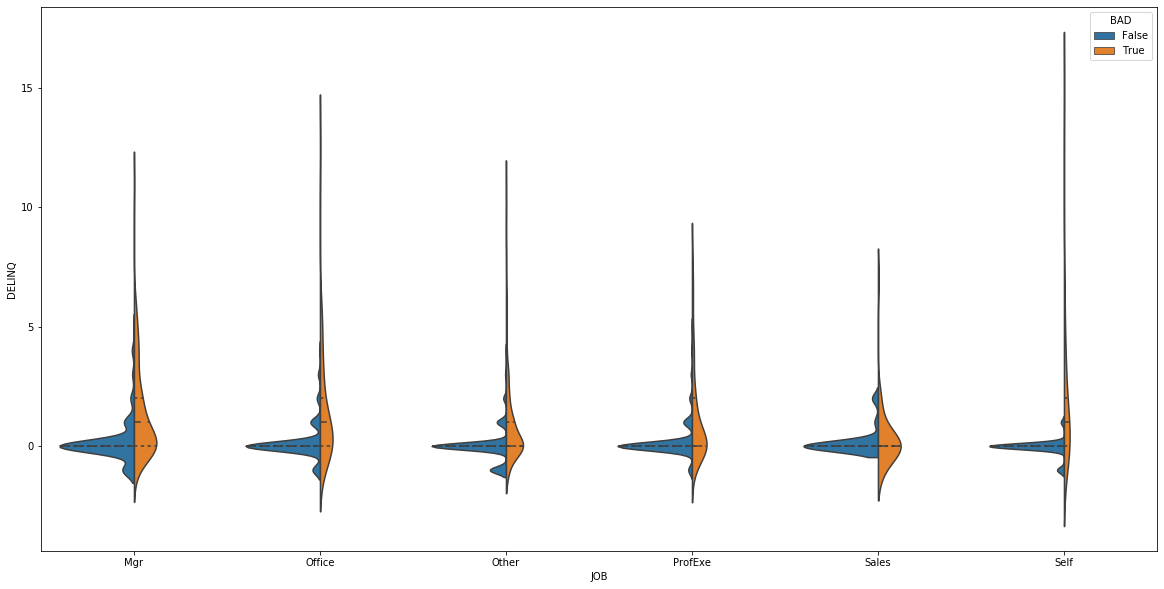

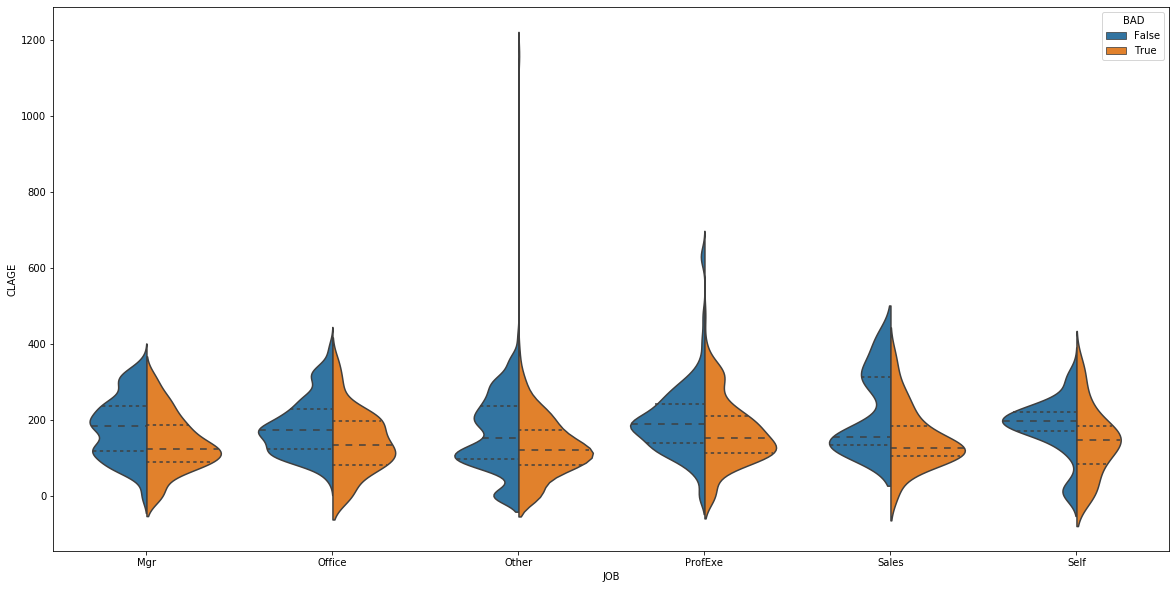

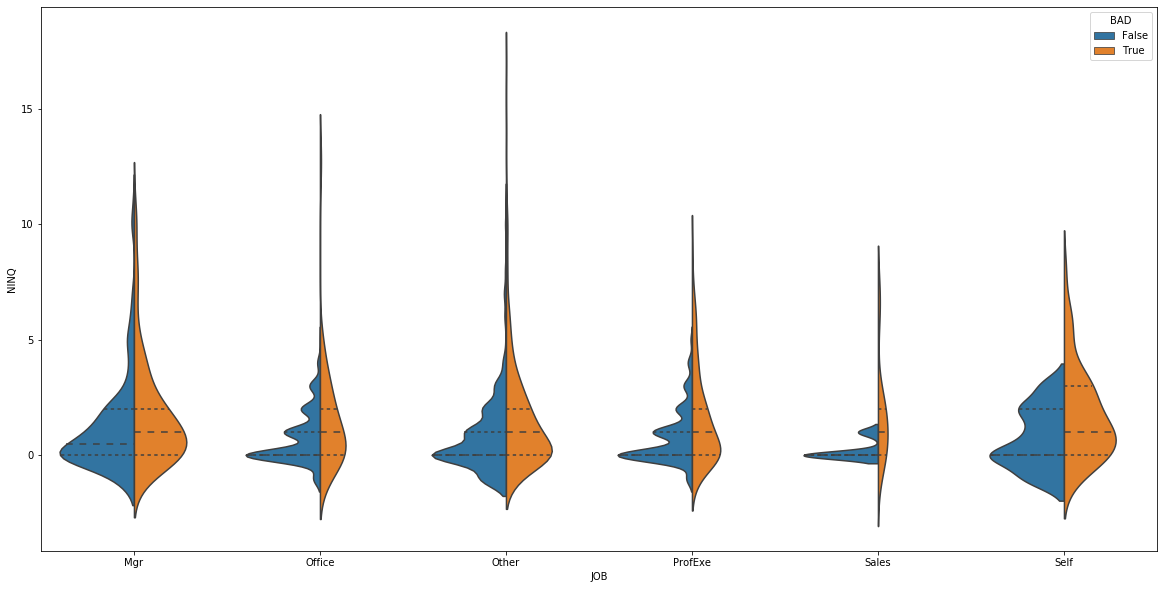

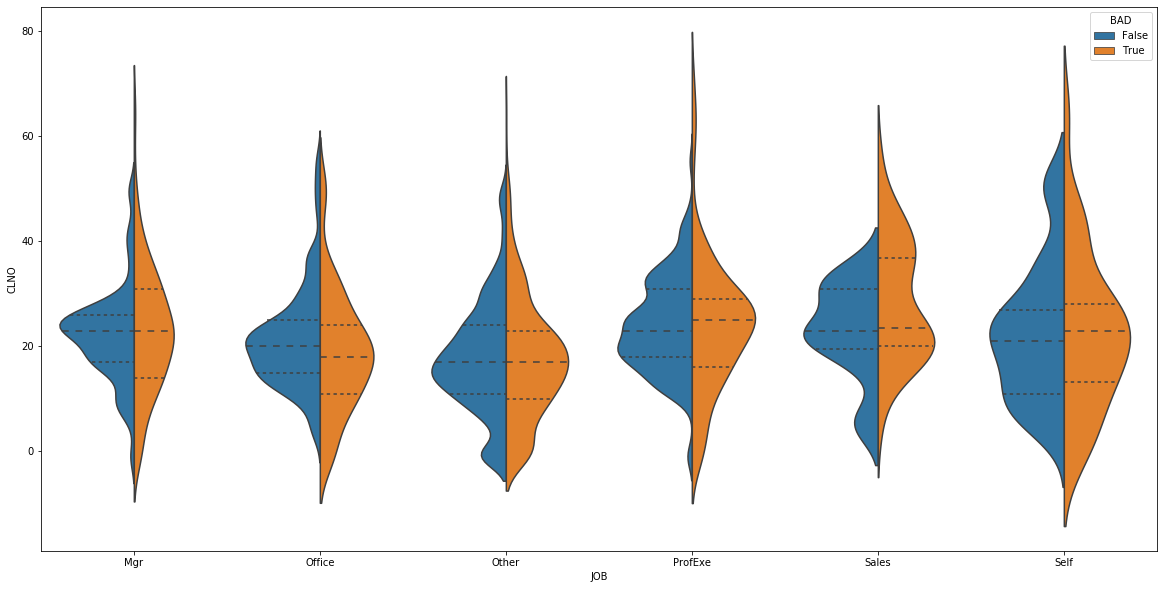

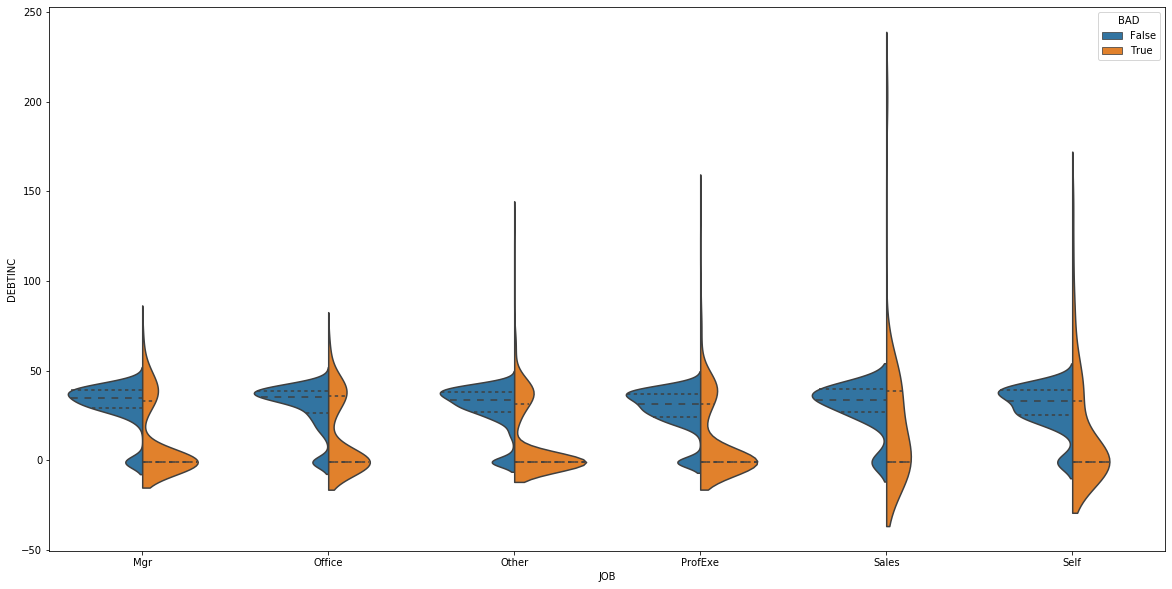

In [46]:
for col  in credit.select_dtypes(include='float64').columns:
    
    plt.figure()

    sns.violinplot(x='JOB', y=col, hue='BAD',
                   split=True, inner="quart",
                   data= credit, subplots=True)
    

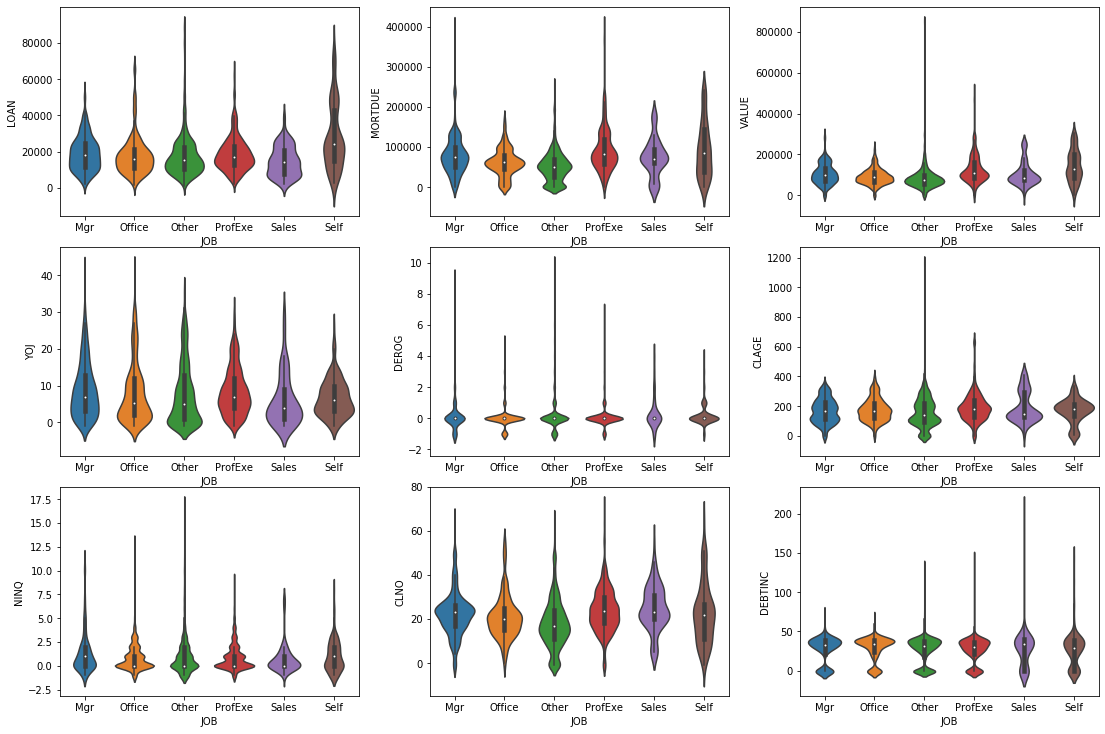

In [47]:
fig, axs = plt.subplots(3,3, figsize=(15, 10))
plt.tight_layout(pad=0.5, w_pad=4, h_pad=1.0)  
x = credit.JOB



sns.violinplot(x=x, y="LOAN",  data=credit,ax=axs[0,0])
sns.violinplot(x=x, y="MORTDUE", data=credit,ax=axs[0,1])
sns.violinplot(x=x, y="VALUE", data=credit,ax=axs[0,2])
sns.violinplot(x=x, y="YOJ", data=credit,ax=axs[1,0])
sns.violinplot(x=x, y="DEROG", data=credit,ax=axs[1,1])
sns.violinplot(x=x, y="CLAGE", data=credit,ax=axs[1,2])
sns.violinplot(x=x, y="NINQ", data=credit,ax=axs[2,0])
sns.violinplot(x=x, y="CLNO", data=credit,ax=axs[2,1])
sns.violinplot(x=x, y="DEBTINC", data=credit,ax=axs[2,2]);

Can you spot any similarities from the plot above and which conclusions can you therefore draw?
In the first plot, how does 'Self' (self-employed) differ from the others and what does this indicate? Is this justifiable in the real world?



### Final  Tasks



In [48]:
# Standardize at the end to allow interpretability 
# update dataframe
#we still have the df "varnum" saved from the analysis

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

varnum = credit.select_dtypes(include='float64')
varnumstand = pd.DataFrame(sc_X.fit_transform(varnum), columns=varnum.columns)
creditnew = credit.drop(columns=credit.select_dtypes(include='float64').columns)
creditnew = pd.concat([creditnew, varnumstand], axis=1, join='inner')
creditnew.head()


BAD   REASON     JOB      LOAN   MORTDUE     VALUE       YOJ     DEROG  \
0   True  HomeImp   Other -1.562299 -0.877391 -1.040059  0.313925 -0.118334   
1   True  HomeImp   Other -1.544453  0.057161 -0.537881 -0.137282 -0.118334   
2   True  HomeImp   Other -1.526606 -1.138769 -1.421714 -0.524030 -0.118334   
3   True  DebtCon   Other -1.526606 -1.424276 -1.707224 -1.168611 -1.239592   
4  False  HomeImp  Office -1.508759  0.643929  0.207479 -0.652946 -0.118334   

     DELINQ     CLAGE      NINQ      CLNO   DEBTINC  
0 -0.267266 -0.820966  0.000571 -1.060999 -1.696035  
1  1.466038 -0.524493 -0.566838 -0.598311 -1.696035  
2 -0.267266 -0.226220  0.000571 -0.968462 -1.696035  
3 -1.133918 -1.850350 -1.134248 -1.986375 -1.696035  
4 -0.267266 -0.832120 -0.566838 -0.598311 -1.696035

## More Plots

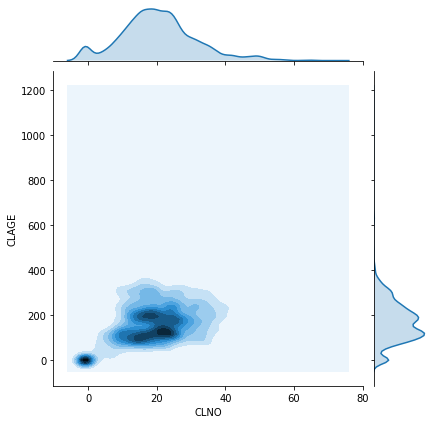

In [49]:
# These variables showed a correlation above 0.30. So we can examine their relationship further by doing the following:
sns.jointplot(x='CLNO',y='CLAGE',data=credit, kind='kde');







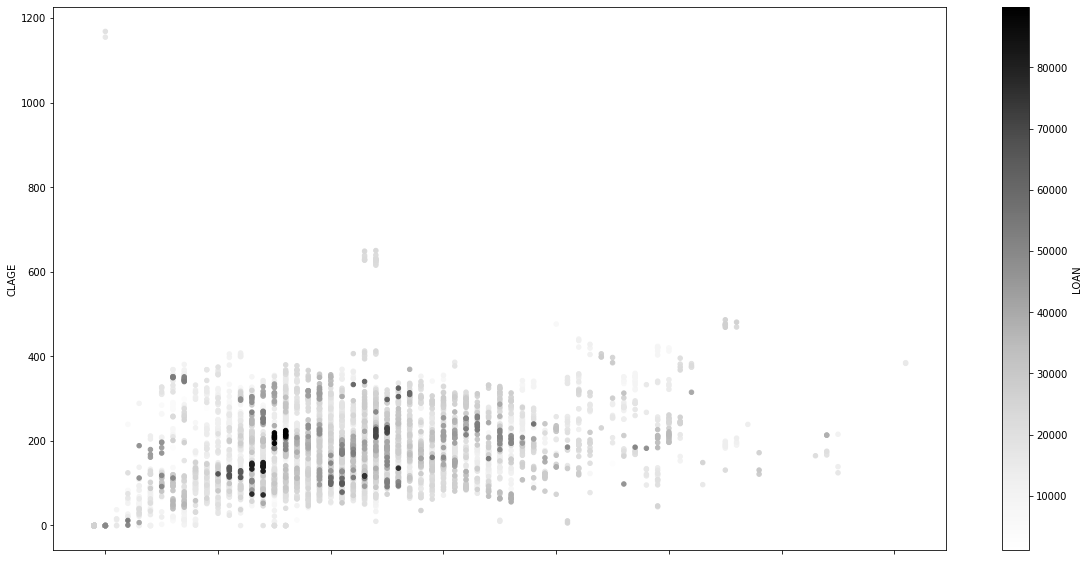

In [50]:
# We will stick with this example for comparability
credit.plot.scatter(x='CLNO',y='CLAGE',c='LOAN');

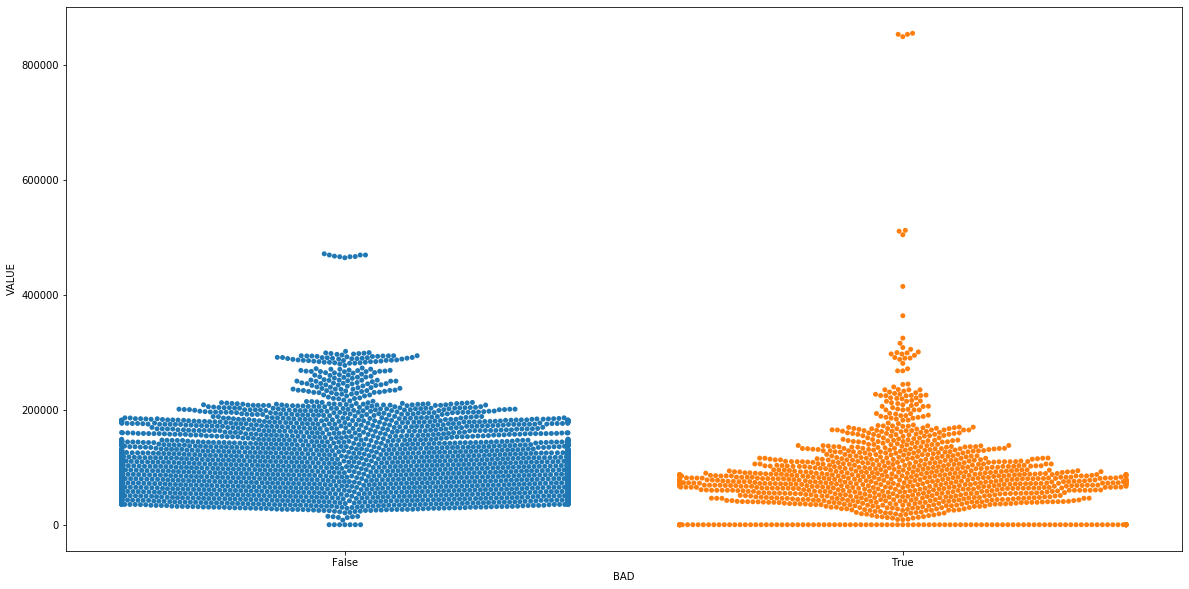

In [52]:
sns.swarmplot(credit['BAD'], credit['VALUE']);

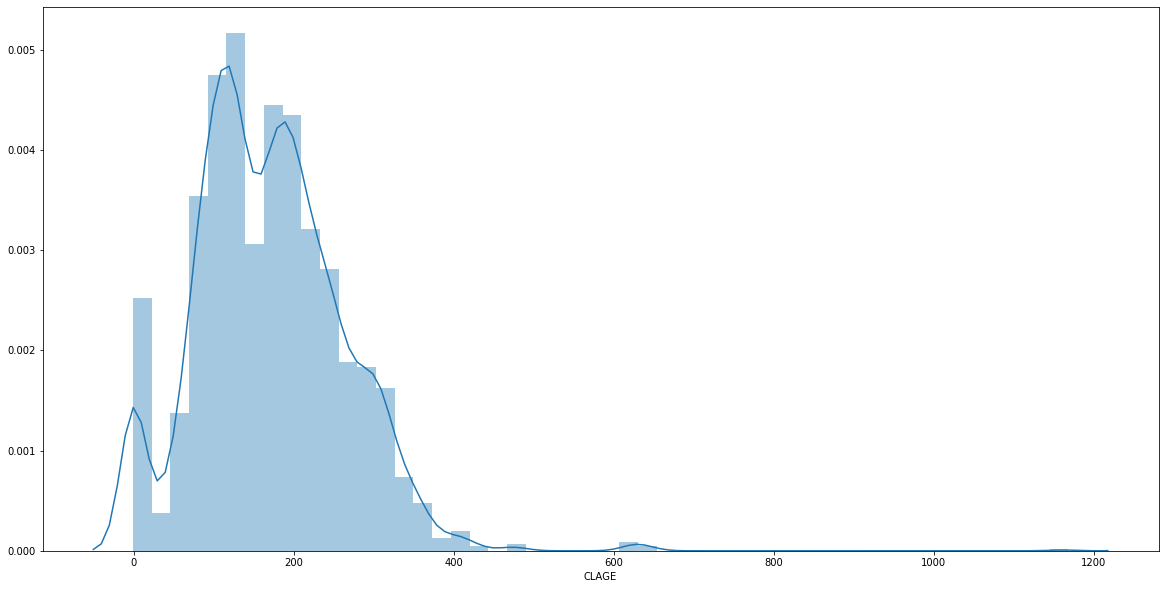

In [53]:
sns.distplot(credit['CLAGE']);